<a href="https://colab.research.google.com/github/AugustoRC/ProjetoIntegrador4/blob/main/P1_4_Codigos_Artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import plotly.figure_factory as ff
from scipy.stats import spearmanr, kendalltau

In [ ]:
df = pd.read_csv("/content/athlete_events.csv", sep=',', header=0)
df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

## Verificando quantidade de valores nulos nas colunas Height e Weight

In [ ]:
x = df['Height'].isna().value_counts()
print(x)

Height
False    210945
True      60171
Name: count, dtype: int64


In [ ]:
y = df['Weight'].isna().value_counts()
print(y)

Weight
False    208241
True      62875
Name: count, dtype: int64


In [ ]:
df_filtrado = df.get(["ID", "Sex", "Age", "Height", "Weight", "NOC", "Year", "Sport", "Season", "Event", "Medal"]).copy()
df_filtrado

ID Sex   Age  Height  Weight  NOC  Year          Sport  Season  \
0            1   M  24.0   180.0    80.0  CHN  1992     Basketball  Summer   
1            2   M  23.0   170.0    60.0  CHN  2012           Judo  Summer   
2            3   M  24.0     NaN     NaN  DEN  1920       Football  Summer   
3            4   M  34.0     NaN     NaN  DEN  1900     Tug-Of-War  Summer   
4            5   F  21.0   185.0    82.0  NED  1988  Speed Skating  Winter   
...        ...  ..   ...     ...     ...  ...   ...            ...     ...   
271111  135569   M  29.0   179.0    89.0  POL  1976           Luge  Winter   
271112  135570   M  27.0   176.0    59.0  POL  2014    Ski Jumping  Winter   
271113  135570   M  27.0   176.0    59.0  POL  2014    Ski Jumping  Winter   
271114  135571   M  30.0   185.0    96.0  POL  1998      Bobsleigh  Winter   
271115  135571   M  34.0   185.0    96.0  POL  2002      Bobsleigh  Winter   

                                           Event Medal  
0                    Basketball Men's Basketball   NaN  
1                   Judo Men's Extra-Lightweight   NaN  
2                        Football Men's Football   NaN  
3                    Tug-Of-War Men's Tug-Of-War  Gold  
4               Speed Skating Women's 500 metres   NaN  
...                                          ...   ...  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN  

[271116 rows x 11 columns]

## Passando valores das colunas "Sex", "Medal" e "Season" para numéricos

In [ ]:
sex_filtrado = {
    "M": 0,
    "F": 1
}

medal_filtrado = {
    "Gold": 1,
    "Silver": 2,
    "Bronze": 3
    #Fillna = 4
}

season_filtrado = {
    "Summer": 0,
    "Winter": 1
}

In [ ]:
df_filtrado["Sex"] = df_filtrado["Sex"].replace(sex_filtrado)
df_filtrado["Sex"]

0         0
1         0
2         0
3         0
4         1
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Sex, Length: 271116, dtype: int64

In [ ]:
df_filtrado["Medal"] = df_filtrado["Medal"].replace(medal_filtrado)
df_filtrado["Medal"] = df_filtrado["Medal"].fillna(4)
df_filtrado["Medal"]

0         4.0
1         4.0
2         4.0
3         1.0
4         4.0
         ... 
271111    4.0
271112    4.0
271113    4.0
271114    4.0
271115    4.0
Name: Medal, Length: 271116, dtype: float64

In [ ]:
df_filtrado["Season"] = df_filtrado["Season"].replace(season_filtrado)
df_filtrado["Season"]

0         0
1         0
2         0
3         0
4         1
         ..
271111    1
271112    1
271113    1
271114    1
271115    1
Name: Season, Length: 271116, dtype: int64

In [ ]:
df_filtrado

ID  Sex   Age  Height  Weight  NOC  Year          Sport  Season  \
0            1    0  24.0   180.0    80.0  CHN  1992     Basketball       0   
1            2    0  23.0   170.0    60.0  CHN  2012           Judo       0   
2            3    0  24.0     NaN     NaN  DEN  1920       Football       0   
3            4    0  34.0     NaN     NaN  DEN  1900     Tug-Of-War       0   
4            5    1  21.0   185.0    82.0  NED  1988  Speed Skating       1   
...        ...  ...   ...     ...     ...  ...   ...            ...     ...   
271111  135569    0  29.0   179.0    89.0  POL  1976           Luge       1   
271112  135570    0  27.0   176.0    59.0  POL  2014    Ski Jumping       1   
271113  135570    0  27.0   176.0    59.0  POL  2014    Ski Jumping       1   
271114  135571    0  30.0   185.0    96.0  POL  1998      Bobsleigh       1   
271115  135571    0  34.0   185.0    96.0  POL  2002      Bobsleigh       1   

                                           Event  Medal  
0                    Basketball Men's Basketball    4.0  
1                   Judo Men's Extra-Lightweight    4.0  
2                        Football Men's Football    4.0  
3                    Tug-Of-War Men's Tug-Of-War    1.0  
4               Speed Skating Women's 500 metres    4.0  
...                                          ...    ...  
271111                Luge Mixed (Men)'s Doubles    4.0  
271112  Ski Jumping Men's Large Hill, Individual    4.0  
271113        Ski Jumping Men's Large Hill, Team    4.0  
271114                      Bobsleigh Men's Four    4.0  
271115                      Bobsleigh Men's Four    4.0  

[271116 rows x 11 columns]

## Métricas Estatísticas

In [ ]:
def genericNumbersStatistic(dados, column):
    media = round(dados[column].mean(), 2)
    mediana = round(dados[column].median(), 2)
    moda = dados[column].mode()
    maximo = round(dados[column].max(), 2)
    minimo = round(dados[column].min(), 2)
    desvio = round(dados[column].std(), 2)
    variancia = round(dados[column].var(), 2)
    variancia_pop = round(dados[column].var(ddof=1), 2)
    curtose = round(dados[column].kurt(), 2)
    assimetria = round(dados[column].skew(), 2)
    primeir_Quart = round(dados[column].quantile(0.25), 2)
    ultim_quartil = round(dados[column].quantile(0.75), 2)
    fra = Counter(dados[column])
    tamanho_dados = len(dados[column])
    frr = {valor: round(frequencia / tamanho_dados, 2) for valor, frequencia in fra.items()}
    frper = {valor: round(frequencia * 100, 2) for valor, frequencia in frr.items()}
    quant = round(dados[column].count(), 2)
    amplitude = round(maximo - minimo, 2)

    if dados[column].isna().any() or dados[column].__contains__('') or dados[column].isnull().any():
        quant = round(dados[column].dropna().count(), 2)
        fra = Counter(dados[column].dropna().value_counts())
        tamanho_dados = len(dados[column].dropna())
        frr = {valor: round(frequencia / tamanho_dados, 2) for valor, frequencia in fra.items()}
        frper = {valor: round(frequencia * 100, 2) for valor, frequencia in frr.items()}

    tabela = pd.DataFrame({
        'Estatística': ['Quantidade', 'Média', 'Mediana', 'Moda', 'Máximo', 'Mínimo',
                        'Desvio Padrão', 'Variância Amostral', 'Variância Populacional', 'Curtose', 'Assimetria', 'Primeiro Quartil',
                        'Último Quartil', 'Amplitude'],
        'Valor': [quant, media, mediana, moda, maximo, minimo, desvio, variancia, variancia_pop, curtose,
                  assimetria, primeir_Quart, ultim_quartil, amplitude]
    })
    tabela['Valor'] = tabela['Valor'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, pd.Series) else x)

    print(f'\nTabela da variável {column}:')
    print(tabela)

    tableFR = pd.DataFrame({
        'Valores:': list(fra.keys()),
        'Frequência Absoluta': list(fra.values()),
        'Frequência Relativa': list(frr.values()),
        'Frequência Percentual': list(frper.values())
    })
    print(f'\n\nTabela de Frequências da variável {column}: ')
    print(tableFR)
    return tabela, tableFR

def genericNotNumbersStatistic(dados, column):
    fra = Counter(dados[column])
    tamanho_dados = len(dados[column])
    frr = {valor: round(frequencia / tamanho_dados, 2) for valor, frequencia in fra.items()}
    frper = {valor: round(frequencia * 100, 2) for valor, frequencia in frr.items()}

    if dados[column].isna().any() or dados[column].__contains__('') or dados[column].isnull().any():
        fra = Counter(dados[column].dropna().value_counts())
        tamanho_dados = len(dados[column].dropna())
        frr = {valor: round(frequencia / tamanho_dados, 2) for valor, frequencia in fra.items()}
        frper = {valor: round(frequencia * 100, 2) for valor, frequencia in frr.items()}

    tableFR = pd.DataFrame({
        'Valores:': list(fra.keys()),
        'Frequência Absoluta': list(fra.values()),
        'Frequência Relativa': list(frr.values()),
        'Frequência Percentual': list(frper.values())
    })
    print(f'\n\nTabela de Frequências da variável {column}: ')
    print(tableFR)
    return tableFR

def grafico_genericNumbersStatistic(dados, column):
    tabela, tableFR = genericNumbersStatistic(dados, column)
    fig = px.histogram(dados, x=column, title=f'Histograma para {column}')
    fig.show()
    boxplot(dados, column)
    histogramaComDensidade(dados, column)

    return tabela, tableFR


def grafico_genericNotNumbersStatistic(dados, column):
    tableFR = genericNotNumbersStatistic(dados, column)

    counts = dados[column].value_counts().reset_index()
    print("counts:",counts)
    counts.columns = [column, 'Count']
    fig = px.bar(counts, x=column, y='Count', title=f'Contagem de Valores para {column}')
    x_range = range(int(dados[column].min()), int(dados[column].max()) + 1, 4)
    fig.update_xaxes(tickvals=list(x_range), ticktext=list(x_range))
    fig.show()

    fig = px.pie(counts, names=column, values=counts['Count'], title=f'Gráfico de Setores para {column}')
    fig.show()
    return tableFR


def boxplot(dados, column):
    fig = px.box(dados, y=column, title=f'Boxplot para {column}')
    fig.show()


def histogramaComDensidade (dados, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(dados, x=column, kde=True)
    plt.title(f'Histograma de Densidade para {column}')
    plt.xlabel(column)
    plt.ylabel('Densidade')
    plt.show()


def dispersao(dados, x_column, y_column):
    fig = px.scatter(dados, x=x_column, y=y_column, title=f'Gráfico de Dispersão entre {x_column} e {y_column}')
    fig.show()

def continuous_association(dados, column1, column2):
    dispersao(dados, column1, column2)

    # Calcule a correlação de Pearson
    contingency_table = pd.crosstab(dados[column1], dados[column2])
    chi2, p, _, _ = scipy.stats.chi2_contingency(contingency_table)
    print(f"\nQui-quadrado de {column1} e {column2}: {round(chi2,2)}")
    print(f"Valor p de {column1} e {column2}: {round(p,2)}")
    correlation = dados[column1].corr(dados[column2])
    print(f"\nCorrelação de Pearson: {round(correlation,2)}")

    # Crie um gráfico de histograma 2D
    fig2 = go.Figure(go.Histogram2dContour(
        x=dados[column1],
        y=dados[column2],
        colorscale='Blues',
        showscale=False,
    ))
    fig2.update_layout(title=f'Gráfico de área {column1} e {column2}')
    fig2.show()

def categorical_association(dados, column1, column2):
    contingency_table = pd.crosstab(dados[column1], dados[column2])

    chi2, p, _, _ = scipy.stats.chi2_contingency(contingency_table)
    print(f"\nQui-quadrado de {column1} e {column2}: {chi2}")
    print(f"Valor p de {column1} e {column2}: {p}")

    correlacao_spearman, p_valor_spearman = spearmanr(dados[column1], dados[column2])
    print(f"Correlação de Spearman: {round(correlacao_spearman,2)}")
    print(f"P-valor de Spearman: {round(p_valor_spearman,2)}")

    fig = px.bar(contingency_table, x=contingency_table.index, y=contingency_table.columns, title=f'Gráfico de barras com os pares de {column1} e {column2}', barmode='group')
    fig.show()


def mixed_association(dados, qualitative_var, quantitative_var):
    # Gráfico de Dispersão com Cores
    fig3 = px.scatter(dados, x=qualitative_var, y=quantitative_var, color=qualitative_var,
                     title=f'Gráfico de Dispersão com Cores de {quantitative_var} por {qualitative_var}')
    fig3.update_xaxes(title_text=qualitative_var)
    fig3.update_yaxes(title_text=quantitative_var)

    # Gráfico de Barras Agrupado (Médias)
    grouped_data = dados.groupby(qualitative_var)[quantitative_var].mean().reset_index()
    fig4 = px.bar(grouped_data, x=qualitative_var, y=quantitative_var,
                 title=f'Gráfico de Barras Agrupado de {quantitative_var} por {qualitative_var}')
    fig4.update_xaxes(title_text=qualitative_var)
    fig4.update_yaxes(title_text=f'Média de {quantitative_var}')

    fig3.show()
    fig4.show()

    contingency_table = pd.crosstab(dados[qualitative_var], dados[quantitative_var])
    chi2, p, _, _ = scipy.stats.chi2_contingency(contingency_table)
    print(f"\nQui-quadrado de {qualitative_var} e {quantitative_var}: {round(chi2,2)}")
    print(f"Valor p de {qualitative_var} e {quantitative_var}: {round(p,2)}")

    correlacao_kendall, p_valor_kendall = kendalltau(dados[qualitative_var], dados[quantitative_var])
    print(f"Correlação de Kendall: {round(correlacao_kendall,2)}")
    print(f"P-valor de Kendall: {round(p_valor_kendall,2)}")

    summary_stats = dados.groupby(qualitative_var)[quantitative_var].describe()
    print(summary_stats)

## Verificando incidência de cada gênero nas Olimpíadas

In [ ]:
grafico_genericNotNumbersStatistic(dados=df_filtrado,column='Sex')



Tabela de Frequências da variável Sex: 
   Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0         0               196594                 0.73                   73.0
1         1                74522                 0.27                   27.0
counts:    Sex   count
0    0  196594
1    1   74522


Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0         0               196594                 0.73                   73.0
1         1                74522                 0.27                   27.0

In [ ]:
grafico_genericNotNumbersStatistic(dados=df_filtrado,column='Season')



Tabela de Frequências da variável Season: 
   Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0         0               222552                 0.82                   82.0
1         1                48564                 0.18                   18.0
counts:    Season   count
0       0  222552
1       1   48564


Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0         0               222552                 0.82                   82.0
1         1                48564                 0.18                   18.0

In [ ]:
grafico_genericNotNumbersStatistic(dados=df_filtrado,column='Medal')



Tabela de Frequências da variável Medal: 
   Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0       4.0               231333                 0.85                   85.0
1       1.0                13372                 0.05                    5.0
2       3.0                13295                 0.05                    5.0
3       2.0                13116                 0.05                    5.0
counts:    Medal   count
0    4.0  231333
1    1.0   13372
2    3.0   13295
3    2.0   13116


Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0       4.0               231333                 0.85                   85.0
1       1.0                13372                 0.05                    5.0
2       3.0                13295                 0.05                    5.0
3       2.0                13116                 0.05                    5.0

In [ ]:
grafico_genericNotNumbersStatistic(dados=df_filtrado,column='Sport')



Tabela de Frequências da variável Sport: 
         Valores:  Frequência Absoluta  Frequência Relativa  \
0      Basketball                 4536                 0.02   
1            Judo                 3801                 0.01   
2        Football                 6745                 0.02   
3      Tug-Of-War                  170                 0.00   
4   Speed Skating                 5613                 0.02   
..            ...                  ...                  ...   
61   Jeu De Paume                   11                 0.00   
62          Roque                    4                 0.00   
63       Alpinism                   25                 0.00   
64  Basque Pelota                    2                 0.00   
65    Aeronautics                    1                 0.00   

    Frequência Percentual  
0                     2.0  
1                     1.0  
2                     2.0  
3                     0.0  
4                     2.0  
..                    ...  
61 

Valores:  Frequência Absoluta  Frequência Relativa  \
0      Basketball                 4536                 0.02   
1            Judo                 3801                 0.01   
2        Football                 6745                 0.02   
3      Tug-Of-War                  170                 0.00   
4   Speed Skating                 5613                 0.02   
..            ...                  ...                  ...   
61   Jeu De Paume                   11                 0.00   
62          Roque                    4                 0.00   
63       Alpinism                   25                 0.00   
64  Basque Pelota                    2                 0.00   
65    Aeronautics                    1                 0.00   

    Frequência Percentual  
0                     2.0  
1                     1.0  
2                     2.0  
3                     0.0  
4                     2.0  
..                    ...  
61                    0.0  
62                    0.0  
63                    0.0  
64                    0.0  
65                    0.0  

[66 rows x 4 columns]

In [ ]:
grafico_genericNotNumbersStatistic(dados=df_filtrado,column='NOC')



Tabela de Frequências da variável NOC: 
    Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0        CHN                 5141                 0.02                    2.0
1        DEN                 3570                 0.01                    1.0
2        NED                 5839                 0.02                    2.0
3        USA                18853                 0.07                    7.0
4        FIN                 5467                 0.02                    2.0
..       ...                  ...                  ...                    ...
225      TUV                    7                 0.00                    0.0
226      NFL                    1                 0.00                    0.0
227      KOS                    8                 0.00                    0.0
228      SSD                    3                 0.00                    0.0
229      LES                   66                 0.00                    0.0

[230 rows x 4 columns

Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0        CHN                 5141                 0.02                    2.0
1        DEN                 3570                 0.01                    1.0
2        NED                 5839                 0.02                    2.0
3        USA                18853                 0.07                    7.0
4        FIN                 5467                 0.02                    2.0
..       ...                  ...                  ...                    ...
225      TUV                    7                 0.00                    0.0
226      NFL                    1                 0.00                    0.0
227      KOS                    8                 0.00                    0.0
228      SSD                    3                 0.00                    0.0
229      LES                   66                 0.00                    0.0

[230 rows x 4 columns]

In [ ]:
df_female = df_filtrado.get(["ID", "Sex", "Year", "Season", "Medal"]).copy()
df_female = df_female.loc[df_female['Sex'] == 1]
df_female = df_female.loc[df_female['Medal'] == 1]
df_female = df_female.loc[df_female['Year'] <= 1968]
df_famale = df_female.sort_values(by='Year')
df_female

ID  Sex  Year  Season  Medal
283        150    1  1900       0    1.0
2143      1191    1  1964       0    1.0
2173      1211    1  1928       0    1.0
4157      2386    1  1956       1    1.0
5147      2929    1  1964       0    1.0
...        ...  ...   ...     ...    ...
267015  133591    1  1960       0    1.0
267017  133591    1  1968       0    1.0
269855  135018    1  1964       0    1.0
269856  135018    1  1968       0    1.0
271076  135553    1  1952       0    1.0

[538 rows x 5 columns]


Tabela da variável Year:
               Estatística    Valor
0               Quantidade      538
1                    Média  1950.35
2                  Mediana   1956.0
3                     Moda     1968
4                   Máximo     1968
5                   Mínimo     1900
6            Desvio Padrão    17.35
7       Variância Amostral   300.93
8   Variância Populacional   300.93
9                  Curtose     0.05
10              Assimetria    -1.02
11        Primeiro Quartil   1936.0
12          Último Quartil   1964.0
13               Amplitude       68


Tabela de Frequências da variável Year: 
    Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0       1900                    4                 0.01                    1.0
1       1964                   86                 0.16                   16.0
2       1928                   34                 0.06                    6.0
3       1956                   54                 0.10                   10.0
4

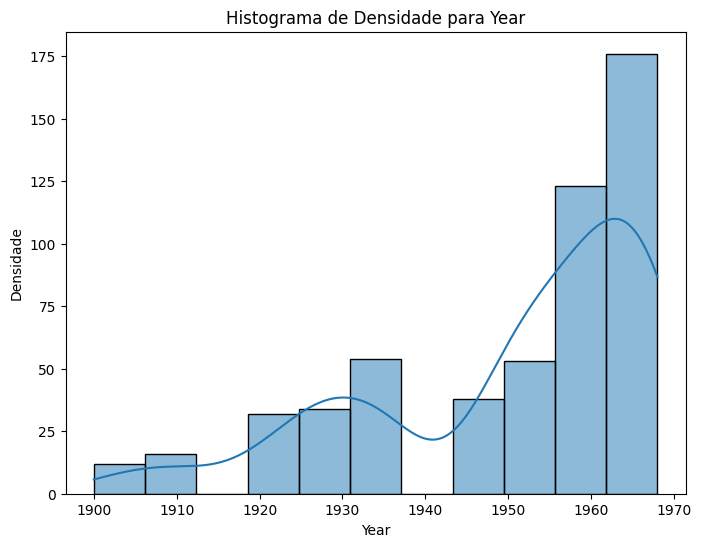

(               Estatística    Valor
 0               Quantidade      538
 1                    Média  1950.35
 2                  Mediana   1956.0
 3                     Moda     1968
 4                   Máximo     1968
 5                   Mínimo     1900
 6            Desvio Padrão    17.35
 7       Variância Amostral   300.93
 8   Variância Populacional   300.93
 9                  Curtose     0.05
 10              Assimetria    -1.02
 11        Primeiro Quartil   1936.0
 12          Último Quartil   1964.0
 13               Amplitude       68,
     Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
 0       1900                    4                 0.01                    1.0
 1       1964                   86                 0.16                   16.0
 2       1928                   34                 0.06                    6.0
 3       1956                   54                 0.10                   10.0
 4       1952                   53               

In [ ]:
grafico_genericNumbersStatistic(dados=df_female,column='Year')


Tabela da variável Height:
               Estatística   Valor
0               Quantidade  210945
1                    Média  175.34
2                  Mediana   175.0
3                     Moda   180.0
4                   Máximo   226.0
5                   Mínimo   127.0
6            Desvio Padrão   10.52
7       Variância Amostral  110.64
8   Variância Populacional  110.64
9                  Curtose    0.18
10              Assimetria    0.02
11        Primeiro Quartil   168.0
12          Último Quartil   183.0
13               Amplitude    99.0


Tabela de Frequências da variável Height: 
    Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0      12492                    1                  0.0                    0.0
1      11976                    1                  0.0                    0.0
2      10708                    1                  0.0                    0.0
3      10320                    1                  0.0                    0.0
4       8284

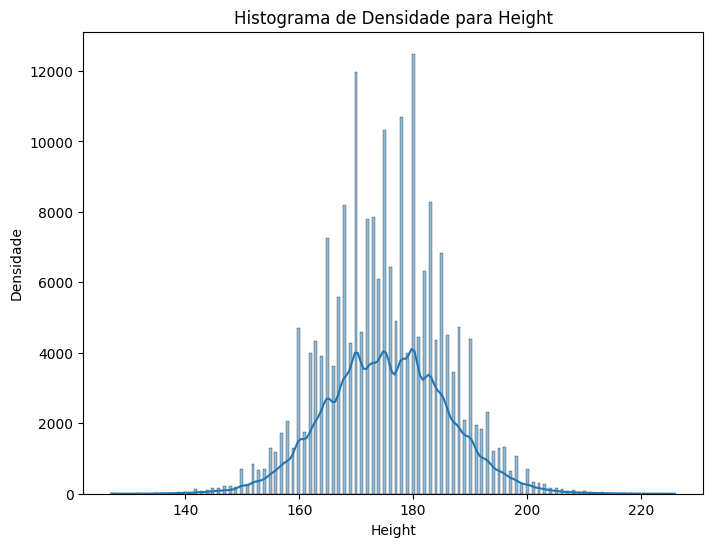


Tabela da variável Weight:
               Estatística   Valor
0               Quantidade  208241
1                    Média    70.7
2                  Mediana    70.0
3                     Moda    70.0
4                   Máximo   214.0
5                   Mínimo    25.0
6            Desvio Padrão   14.35
7       Variância Amostral  205.87
8   Variância Populacional  205.87
9                  Curtose    2.02
10              Assimetria     0.8
11        Primeiro Quartil    60.0
12          Último Quartil    79.0
13               Amplitude   189.0


Tabela de Frequências da variável Weight: 
     Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0        9625                    1                  0.0                    0.0
1        7994                    1                  0.0                    0.0
2        7810                    1                  0.0                    0.0
3        7284                    1                  0.0                    0.0
4      

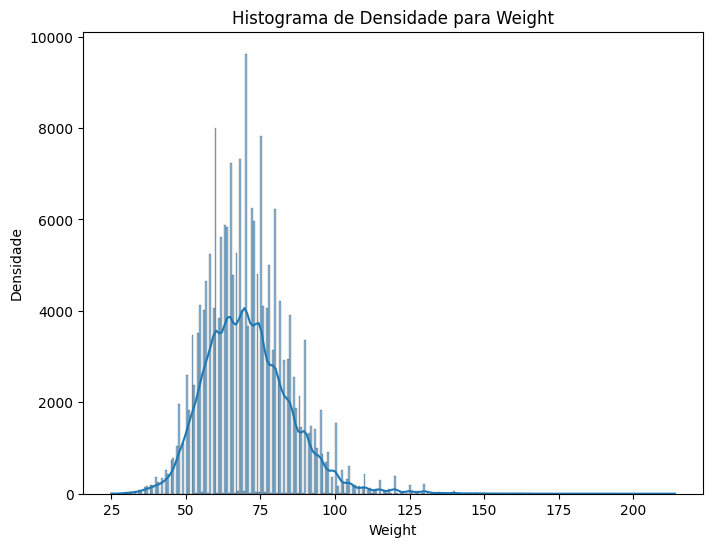


Tabela da variável Year:
               Estatística    Valor
0               Quantidade   271116
1                    Média  1978.38
2                  Mediana   1988.0
3                     Moda     1992
4                   Máximo     2016
5                   Mínimo     1896
6            Desvio Padrão    29.88
7       Variância Amostral   892.67
8   Variância Populacional   892.67
9                  Curtose    -0.21
10              Assimetria    -0.82
11        Primeiro Quartil   1960.0
12          Último Quartil   2002.0
13               Amplitude      120


Tabela de Frequências da variável Year: 
    Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0       1992                16413                 0.06                    6.0
1       2012                12920                 0.05                    5.0
2       1920                 4292                 0.02                    2.0
3       1900                 1936                 0.01                    1.0
4

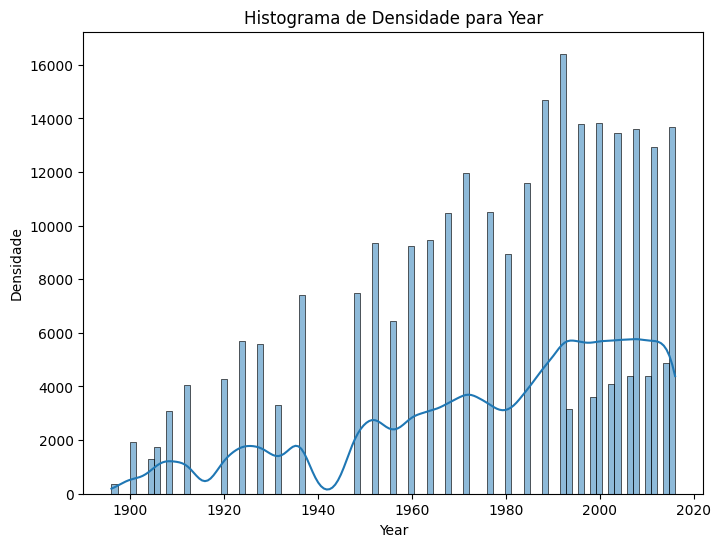


Tabela da variável Age:
               Estatística   Valor
0               Quantidade  261642
1                    Média   25.56
2                  Mediana    24.0
3                     Moda    23.0
4                   Máximo    97.0
5                   Mínimo    10.0
6            Desvio Padrão    6.39
7       Variância Amostral   40.88
8   Variância Populacional   40.88
9                  Curtose    6.27
10              Assimetria    1.75
11        Primeiro Quartil    21.0
12          Último Quartil    28.0
13               Amplitude    87.0


Tabela de Frequências da variável Age: 
    Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
0      21875                    1                  0.0                    0.0
1      21720                    1                  0.0                    0.0
2      20814                    1                  0.0                    0.0
3      19707                    1                  0.0                    0.0
4      19164      

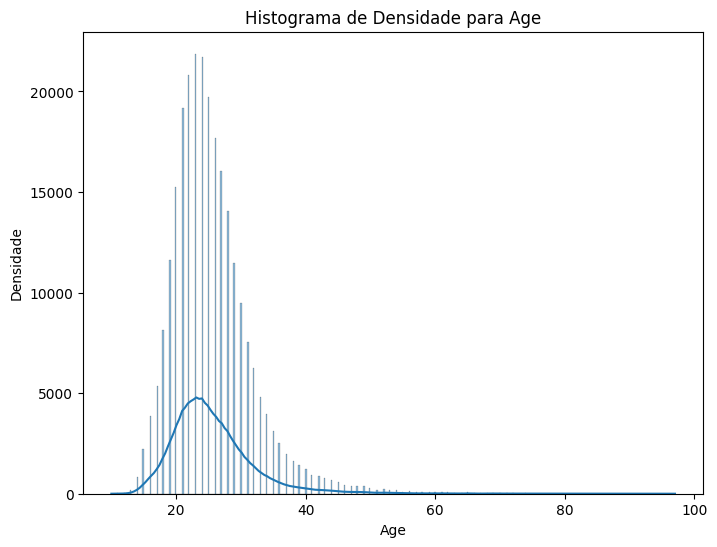

(               Estatística   Valor
 0               Quantidade  261642
 1                    Média   25.56
 2                  Mediana    24.0
 3                     Moda    23.0
 4                   Máximo    97.0
 5                   Mínimo    10.0
 6            Desvio Padrão    6.39
 7       Variância Amostral   40.88
 8   Variância Populacional   40.88
 9                  Curtose    6.27
 10              Assimetria    1.75
 11        Primeiro Quartil    21.0
 12          Último Quartil    28.0
 13               Amplitude    87.0,
     Valores:  Frequência Absoluta  Frequência Relativa  Frequência Percentual
 0      21875                    1                  0.0                    0.0
 1      21720                    1                  0.0                    0.0
 2      20814                    1                  0.0                    0.0
 3      19707                    1                  0.0                    0.0
 4      19164                    1                  0.0         

In [ ]:
grafico_genericNumbersStatistic(df_filtrado, "Height")
grafico_genericNumbersStatistic(df_filtrado, "Weight")
grafico_genericNumbersStatistic(df_filtrado, "Year")
grafico_genericNumbersStatistic(df_filtrado, "Age")

In [ ]:
idade_especifica = 10

# Use a função query para filtrar o DataFrame
x= df_filtrado.query("Age == @idade_especifica")
x

ID  Sex   Age  Height  Weight  NOC  Year       Sport  Season  \
142882  71691    0  10.0     NaN     NaN  GRE  1896  Gymnastics       0   

                                        Event  Medal  
142882  Gymnastics Men's Parallel Bars, Teams    3.0

In [ ]:
continuous_association(dados, column1, column2)

In [ ]:
categorical_association(dados, column1, column2)

In [ ]:
mixed_association(dados, qualitative_var, quantitative_var)

In [ ]:
# # DataFrame com apenas as colunas que contêm dados nulos
# df_null_columns = df.loc[:, df.isnull().any()]

# # DataFrame com apenas as colunas que não contêm dados nulos
# df_not_null_columns = df.loc[:, ~df.isnull().any()]

Colunas mantidas:
Id, Sex, Age, Height, Weight, NOC, Year, Sport, Seasson, Event, Medal.

Colunas retiradas:
Name, Team, Games, City.

Pegar o top 10 nações que mais participaram e o top 10 das que menos participaram.

*Verificar se a análise sobre o peso e a altura influencia no ganho da competição
*Verificar também se o peso e a altura influencia no ganho da competição em relação a estação

*Verificar se o genero infliencia a ganhar competições no inverno ou no verão


*Verificar com as meninas se seria interessante, além dessas análises ou utlizar essas análises para fazer treinamento de ML para ao entrar com novos dados verificar qual seria o desempenho do atleta ou do comitê geral.